#### Mini Project III -- Customer data prep

In [1]:
import pandas as pd

In [2]:
df_ctm = pd.read_csv('data/twm_customer.csv', sep=';')
print(df_ctm.shape)
df_ctm.head()

(747, 15)


,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [3]:
# check duplicates
print('# unique cust_id %i' % df_ctm['cust_id'].unique().shape[0])
df_ctm.isnull().describe()

# unique cust_id 747


,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
count,747,747,747,747,747,747,747,747,747,747,747,747,747,747,747
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,747,747,747,747,747,747,747,747,747,747,747,747,747,747,747


In [4]:
print('# of incomes %i' % df_ctm['income'].unique().shape[0])
df_ctm['income'].describe()

# of incomes 640


count       747.000000
mean      22728.281124
std       22207.221405
min           0.000000
25%        7118.500000
50%       17242.000000
75%       31338.000000
max      144157.000000
Name: income, dtype: float64

In [5]:
print('# of ages %i' % df_ctm['age'].unique().shape[0])
df_ctm['age'].describe()

# of ages 77


count    747.000000
mean      42.479250
std       19.114879
min       13.000000
25%       28.000000
50%       42.000000
75%       56.000000
max       89.000000
Name: age, dtype: float64

In [6]:
df_ctm['nbr_children'].describe()

count    747.000000
mean       0.714859
std        1.103410
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: nbr_children, dtype: float64

In [7]:
# Geographic info
# print('# of states %i' % df_ctm['state_code'].unique().shape[0])
# print('# of cities %i' % df_ctm['city_name'].unique().shape[0])

In [8]:
df = df_ctm.drop(['cust_id', 'years_with_bank', 'name_prefix', 'first_name', 'last_name'], axis=1)
df = df.drop(['street_nbr', 'street_name', 'postal_code', 'city_name', 'state_code'], axis=1)
df.head()

,income,age,nbr_children,gender,marital_status
0,26150,46,1,M,2
1,6605,71,0,M,2
2,18548,38,0,F,1
3,47668,54,0,F,1
4,44554,59,2,F,4


In [118]:
df_dum = pd.get_dummies(data=df, columns=df.dtypes[df.dtypes == 'object'].index.values)
df_dum.columns = df_dum.columns.str.strip()
df_dum.drop(['gender_M'], axis=1, inplace=True)
df_dum.drop(df_dum[df_dum.age < 18].index, axis=0, inplace=True)
df_dum.reset_index(drop=True, inplace=True)
df_dum.rename(columns={'gender_F': 'gender'}, inplace=True)
print(df_dum.shape)
df_dum.head()

(645, 5)


,income,age,nbr_children,marital_status,gender
0,26150,46,1,2,0
1,6605,71,0,2,0
2,18548,38,0,1,1
3,47668,54,0,1,1
4,44554,59,2,4,1


<AxesSubplot:xlabel='income', ylabel='Count'>

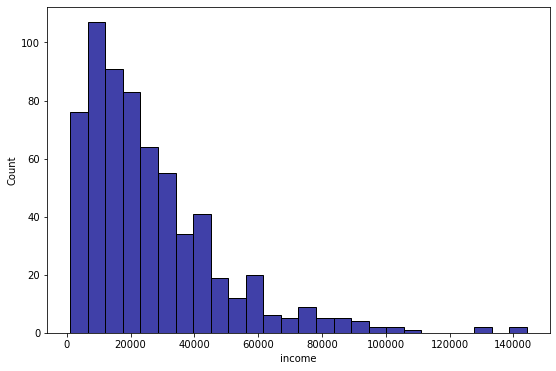

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 6))
sns.histplot(data=df_dum['income'], color='darkblue')

<AxesSubplot:ylabel='age'>

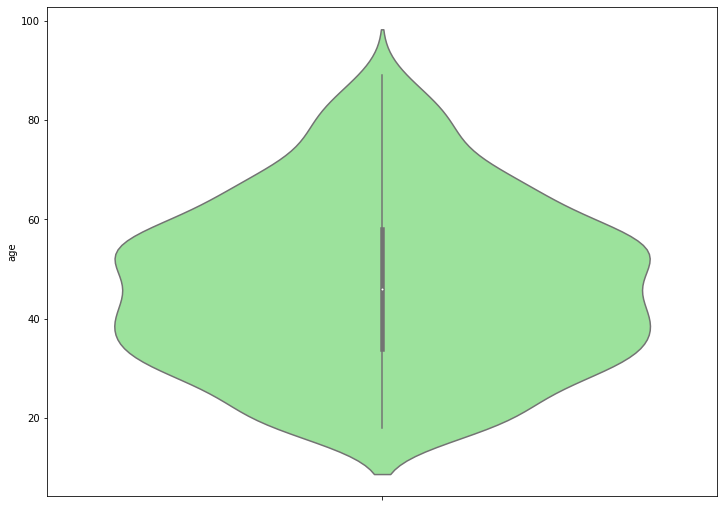

In [11]:
plt.figure(figsize=(12, 9))
sns.violinplot(y=df_dum['age'], color='lightgreen')

<AxesSubplot:xlabel='age', ylabel='income'>

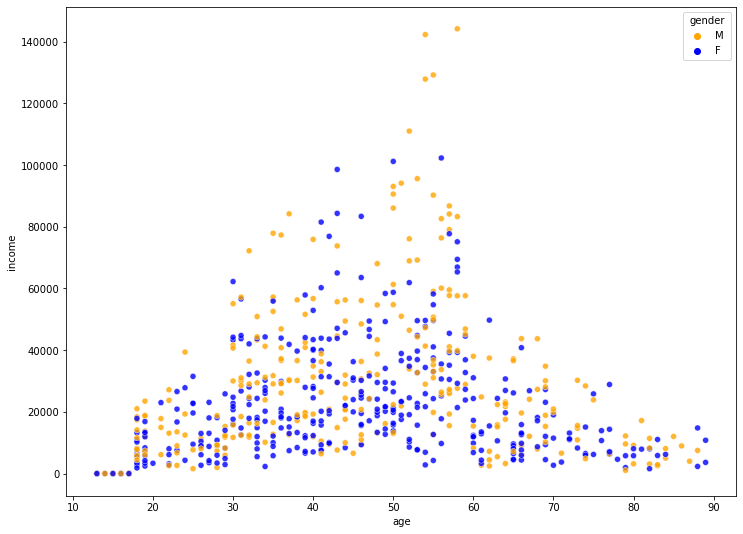

In [12]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=df_ctm, x='age', y='income', hue='gender', alpha=0.8, palette=['orange', 'blue'])

<AxesSubplot:>

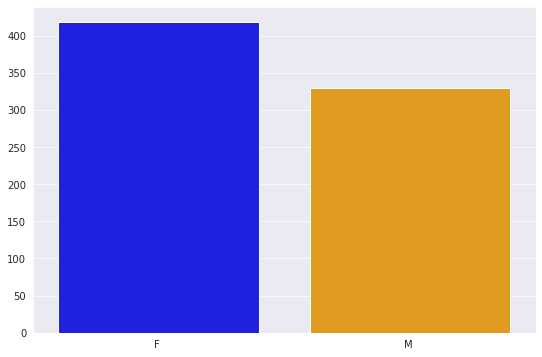

In [13]:
genders = df.gender.value_counts()
sns.set_style('darkgrid')
plt.figure(figsize=(9, 6))
sns.barplot(x=genders.index, y=genders.values, palette=['blue', 'orange'])

In [14]:
# Geographic info
# plt.figure(figsize=(16, 9))
# plt.xticks(rotation=90)
# ax = sns.boxplot(data=df_ctm, x='state_code', y='income')

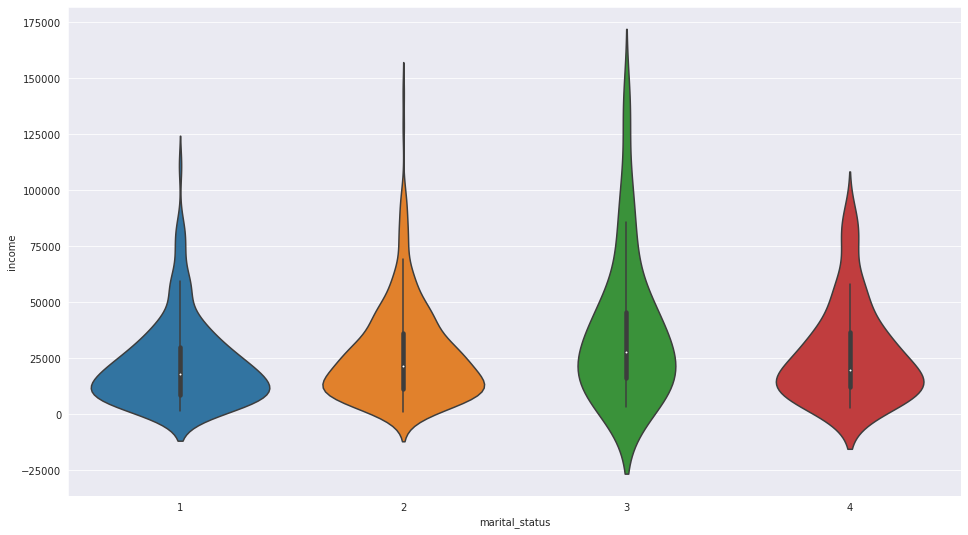

In [15]:
plt.figure(figsize=(16, 9))
ax = sns.violinplot(data=df_dum, x='marital_status', y='income')

In [16]:
# Geographic info
# df_ctm[['income', 'state_code']].groupby(['state_code']).count().sort_values(by=['income'], ascending=False)

### <span style='color:red'> Focus on income vs age

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [64]:
sclr = StandardScaler()
# dum_scaled = pd.DataFrame(sclr.fit_transform(X=df_dum), columns=df_dum.columns)
_scaled = pd.DataFrame(sclr.fit_transform(X=df_dum), columns=df_dum.columns.values)
_scaled.rename(columns={'gender_F': 'gender'}, inplace=True)
_scaled.head()

,income,age,nbr_children,marital_status,gender
0,-0.007909,-0.047338,0.150097,-0.024611,-1.127443
1,-0.903965,1.431981,-0.722087,-0.024611,-1.127443
2,-0.356429,-0.520720,-0.722087,-1.158471,0.886963
3,0.978600,0.426044,-0.722087,-1.158471,0.886963
4,0.835836,0.721908,1.022281,2.243109,0.886963


<AxesSubplot:>

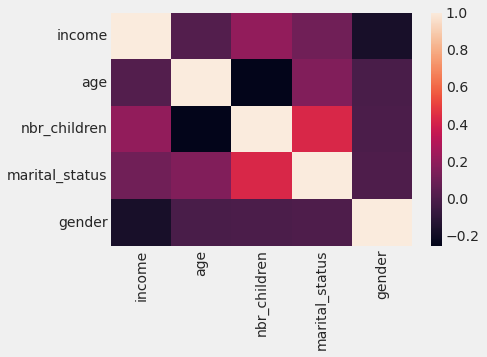

In [61]:
corr_mat = _scaled.corr()
sns.heatmap(data=corr_mat) # , cmap='binary'

In [62]:
corr_mat

,income,age,nbr_children,marital_status,gender
income,1.000000,0.017666,0.202117,0.103792,-0.173518
age,0.017666,1.000000,-0.256623,0.154451,-0.012899
nbr_children,0.202117,-0.256623,1.000000,0.422266,-0.010554
marital_status,0.103792,0.154451,0.422266,1.000000,0.000582
gender,-0.173518,-0.012899,-0.010554,0.000582,1.000000


In [185]:
_x = _scaled.copy()
_x.head()

,income,age,nbr_children,marital_status,gender
0,-0.007909,-0.047338,0.150097,-0.024611,-1.127443
1,-0.903965,1.431981,-0.722087,-0.024611,-1.127443
2,-0.356429,-0.520720,-0.722087,-1.158471,0.886963
3,0.978600,0.426044,-0.722087,-1.158471,0.886963
4,0.835836,0.721908,1.022281,2.243109,0.886963


In [188]:
_npca = 4
_pca = PCA(n_components=_npca)
_l = pd.DataFrame(_pca.fit_transform(_x), columns=['PC%s' %i for i in range(1,_npca+1)])
print(_l.shape)
_l.head()

(645, 4)


,PC1,PC2,PC3,PC4
0,0.251670,0.380875,-0.748847,-0.716488
1,-0.919794,1.490174,0.180959,-1.203531
2,-1.353474,-0.912666,-0.100548,0.610883
3,-0.942327,0.249309,-0.257205,1.651625
4,2.095724,0.618889,1.677819,0.556205


In [189]:
_pca.explained_variance_ratio_.cumsum()

array([0.30699637, 0.53712185, 0.75745423, 0.91655757])

In [190]:
_x_new = pd.DataFrame(_pca.inverse_transform(_l), columns=_x.columns)
_x_new.head()

,income,age,nbr_children,marital_status,gender
0,0.009701,-0.100635,0.071173,0.043561,-1.124876
1,-0.853996,1.280750,-0.946035,0.168826,-1.120161
2,-0.358647,-0.514007,-0.712145,-1.167058,0.886640
3,1.010200,0.330408,-0.863707,-1.036145,0.891568
4,0.772148,0.914659,1.307713,1.996565,0.877682


<AxesSubplot:>

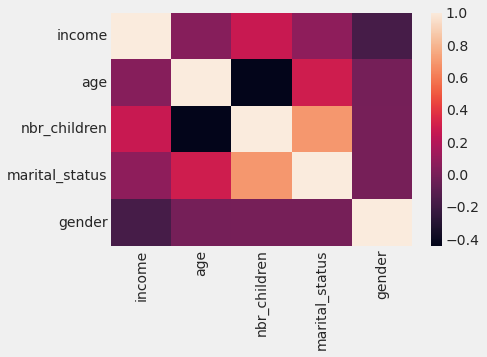

In [191]:
_corr1 = _x_new.corr()
sns.heatmap(_corr1)

In [192]:
_corr1

,income,age,nbr_children,marital_status,gender
income,1.000000,0.047846,0.270937,0.073698,-0.175691
age,0.047846,1.000000,-0.441902,0.295476,-0.009232
nbr_children,0.270937,-0.441902,1.000000,0.694778,-0.005021
marital_status,0.073698,0.295476,0.694778,1.000000,-0.004976
gender,-0.175691,-0.009232,-0.005021,-0.004976,1.000000


<AxesSubplot:>

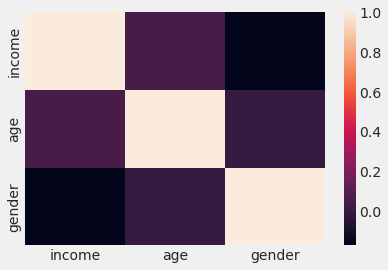

In [195]:
dum_scaled = _x_new.copy()
# df_dum.drop('nbr_children', axis=1, inplace=True)
dum_scaled.drop('nbr_children', axis=1, inplace=True)
dum_scaled.drop('marital_status', axis=1, inplace=True)
# dum_scaled.drop('gender', axis=1, inplace=True)
corr2 = dum_scaled.corr()
sns.heatmap(data=corr2)

In [196]:
corr2

,income,age,gender
income,1.000000,0.047846,-0.175691
age,0.047846,1.000000,-0.009232
gender,-0.175691,-0.009232,1.000000


In [159]:
def plot_clusters(X, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    # plt.figure(figsize=(12, 9))
    for cluster in set(y_res):
        x = X.iloc[y_res == cluster,0]
        y = X.iloc[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=30,
                    marker='o',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    # plt.grid()
    plt.show()

In [160]:
def plot_wcss(X, max_clusters = 10):
    wcss = []
    for k in range(1, max_clusters +1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=50, max_iter=500, algorithm='full')
        km.fit(X)
        wcss.append(km.inertia_)
    plt.figure(figsize=(9, 6))
    plt.plot(range(1,max_clusters +1), wcss, marker='o', linewidth=2, color='r')
    plt.xlabel('Number of clusters')
    plt.xticks(np.arange(1, 11))
    plt.ylabel('WCSS')
    plt.show() 

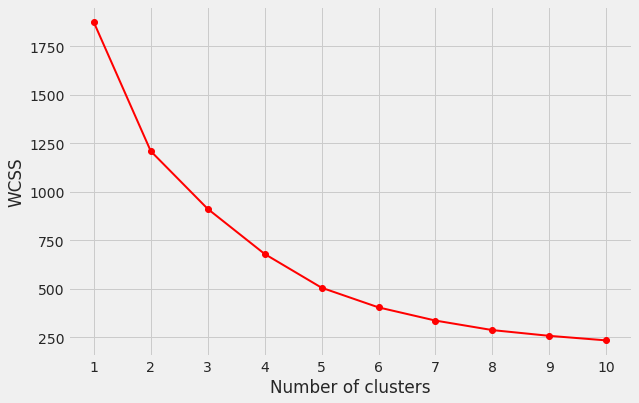

In [197]:
plot_wcss(dum_scaled)

For n_clusters = 2 The average silhouette_score is : 0.3977639552624053
For n_clusters = 3 The average silhouette_score is : 0.3715756139409051
For n_clusters = 4 The average silhouette_score is : 0.3973791054222536
For n_clusters = 5 The average silhouette_score is : 0.42058661291505595
For n_clusters = 6 The average silhouette_score is : 0.4421999673337674


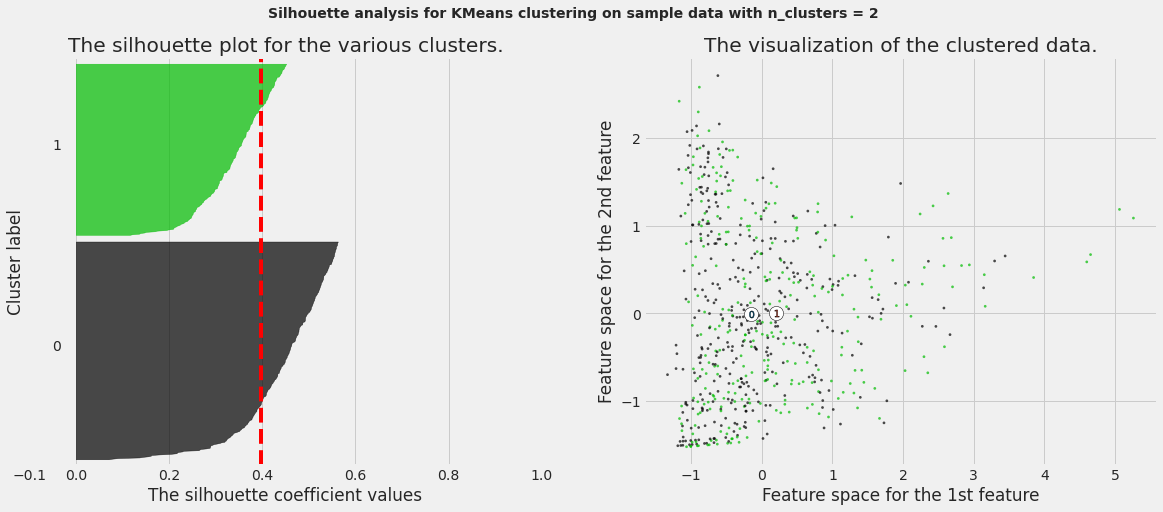

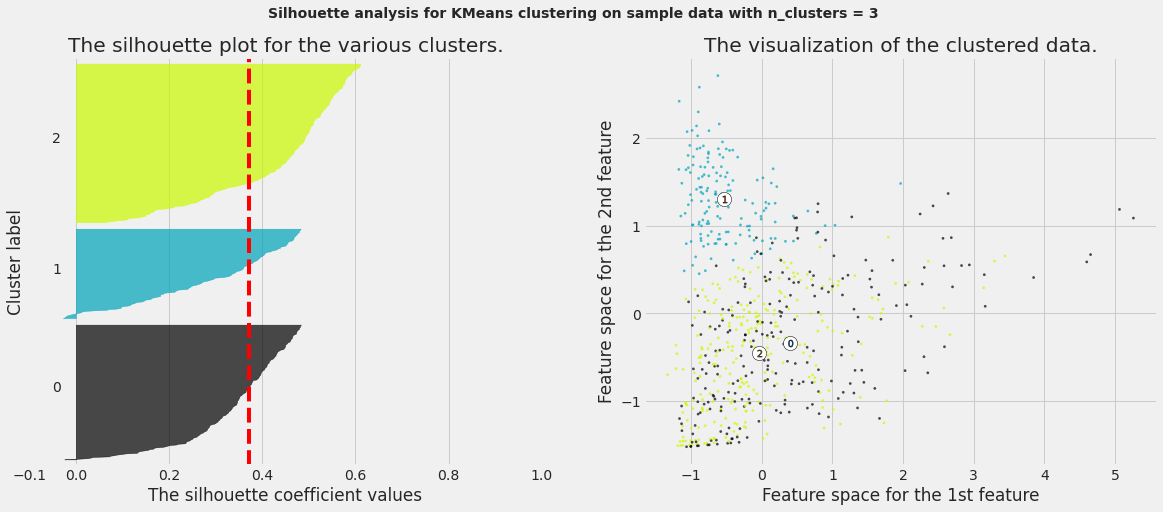

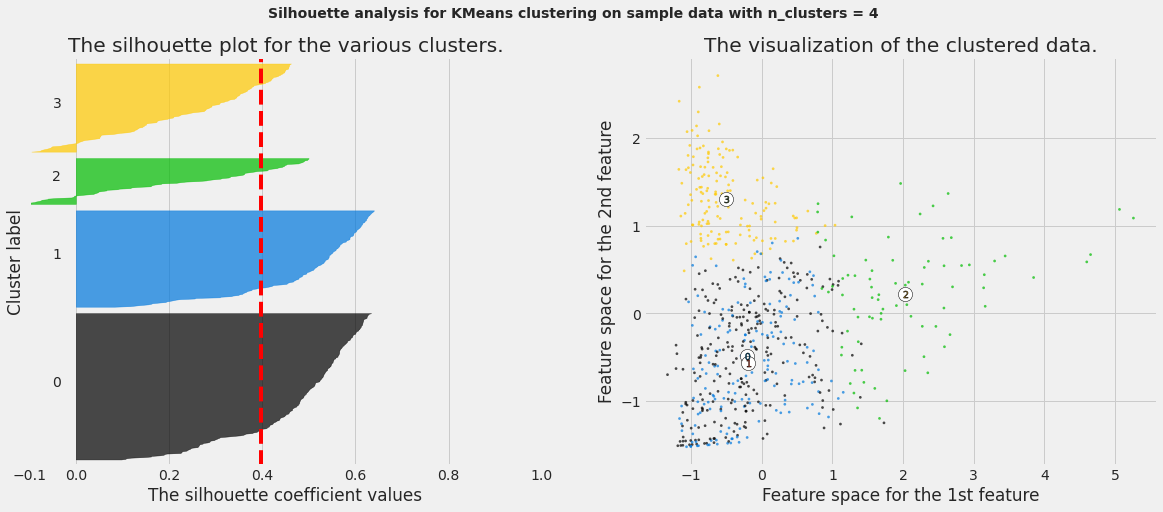

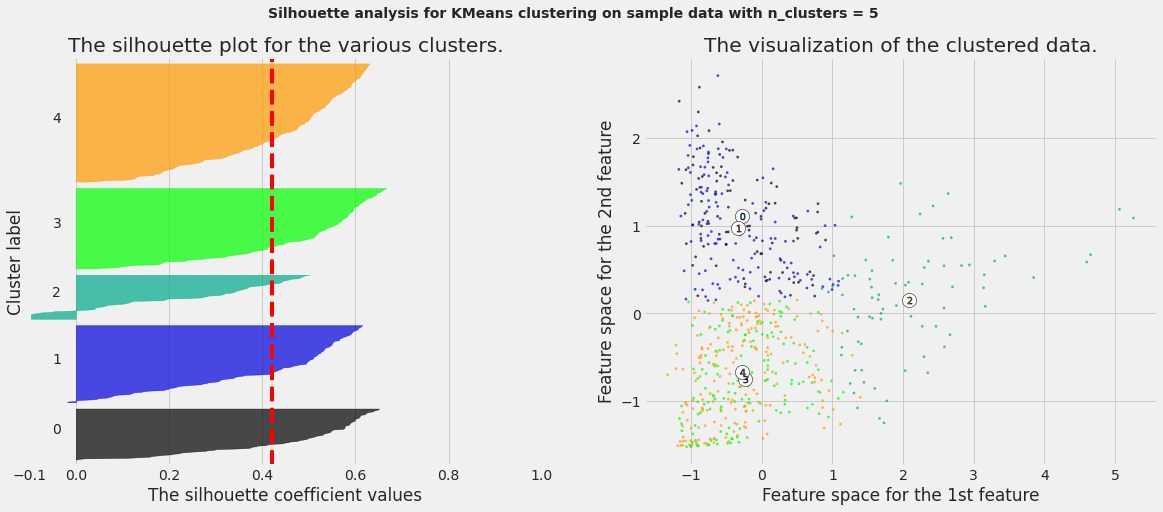

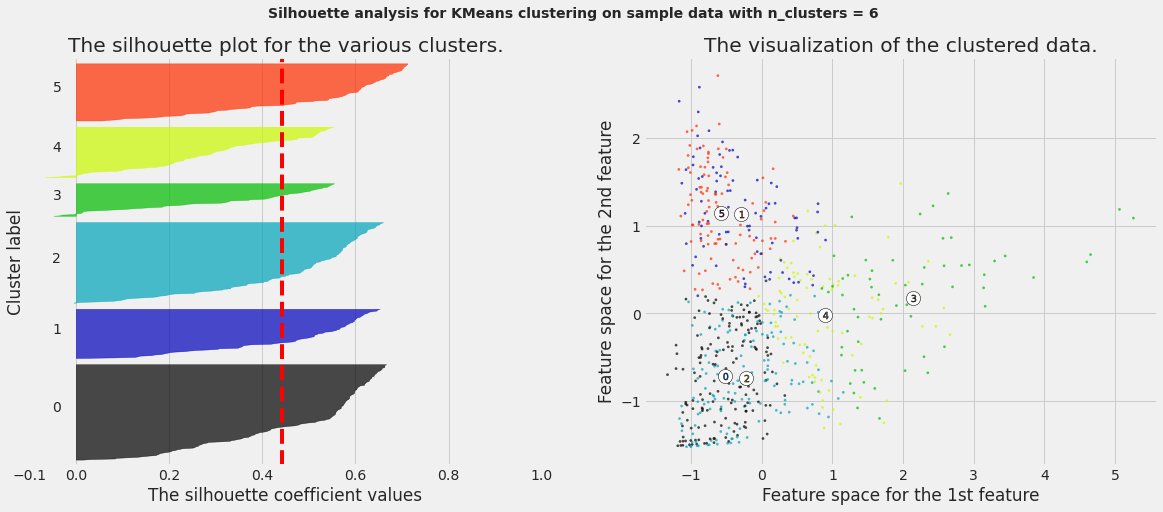

In [198]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dum_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dum_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dum_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dum_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        dum_scaled.iloc[:, 0], dum_scaled.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

k=2


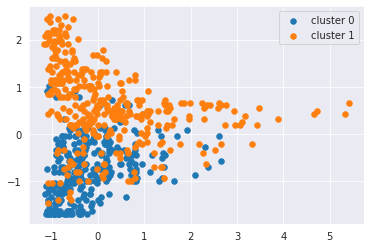

k=3


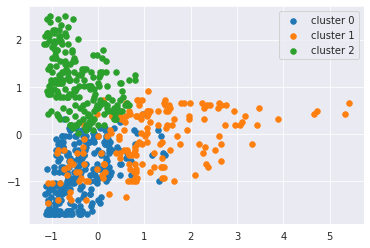

k=4


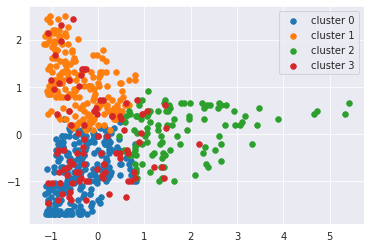

k=5


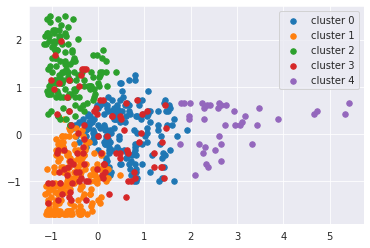

In [27]:
for k in range(2, 6):
    km = KMeans(n_clusters=k, init='k-means++', n_init=50, max_iter=500, algorithm='full')
    y_km = km.fit_predict(X=dum_scaled)
    print('k=%i' % k)
    plot_clusters(dum_scaled, y_km)

In [28]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

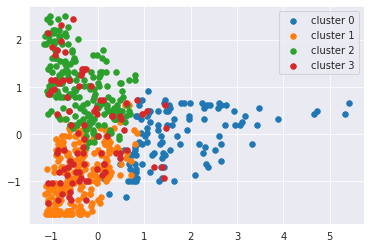

In [29]:
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 4)
y_hc = ac.fit_predict(dum_scaled)
plot_clusters(dum_scaled, y_hc)

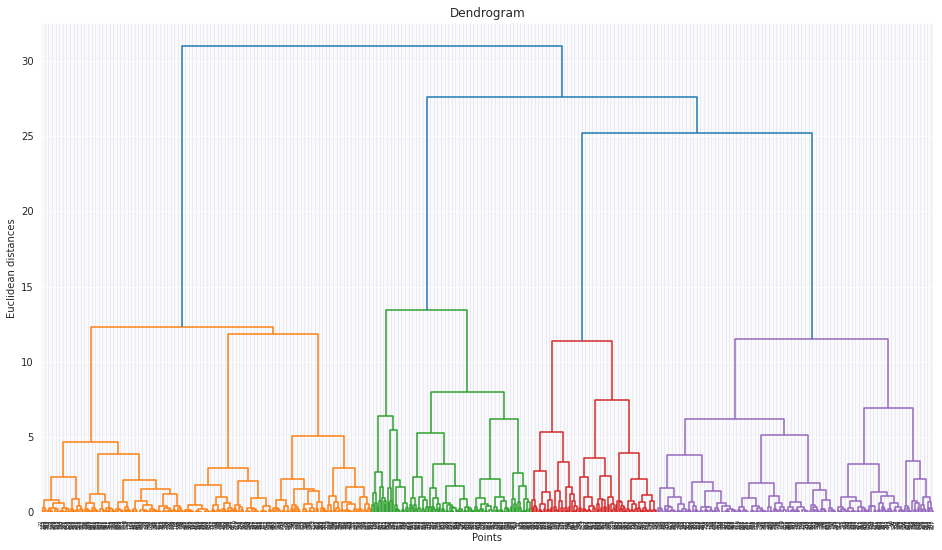

In [30]:
def plot_dendrogram(X, method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()
plt.figure(figsize=(16, 9))
plot_dendrogram(dum_scaled)

In [199]:
N_c = 5
km = KMeans(n_clusters=N_c, init='k-means++', n_init=100, max_iter=5000, algorithm='full')
clusters = km.fit_predict(dum_scaled)
dum_scaled["label"] = clusters
print(clusters.shape, clusters[:10])

(645,) [1 4 3 0 0 3 0 3 1 3]


In [205]:
df_c = []
for i in range(N_c):
    df_c.append(dum_scaled[dum_scaled.label == i].drop('label', axis=1))
    # df_c.append(df_dum[dum_scaled.label == i]) #.drop('label', axis=1))
    # df_c[i] = (df_c[i] - df_c[i].min()) / (df_c[i].max() - df_c[i].min())
    # df_c[i] = (df_c[i] - df_c[i].mean()) / df_c[i].std()

In [201]:
colors = ['orange', 'royalblue', 'green', 'darkviolet', 'violet', 'red']

# df_c[0]

In [206]:
import plotly.graph_objects as go

fig = go.Figure()

for i in range(len(df_c)):
  rat = [*df_c[i].mean().values, df_c[i].mean().values[0]]
  cat = [*df_c[i].columns.values, df_c[i].columns.values[0]]
# fig = px.line_polar(data_frame=df_c1, r=df_c1.mean().values, theta=df_c1.columns.values, line_close=True)
  fig.add_trace(go.Scatterpolar(
      r=rat,
      theta=cat,
    #   fill='toself',
      name=f'Cluster{i+1}',
      line={'color': colors[i]}
  )
)

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
    #   autorange=False
    )),
  showlegend=True,
  width=800, height=600
)
fig.show()

In [81]:
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df_dum.age[dum_scaled.label == 0], df_dum.income[dum_scaled.label == 0], df_dum.marital_status[dum_scaled.label == 0], c='orange', s=50)
# ax.scatter(df_dum.age[dum_scaled.label == 1], df_dum.income[dum_scaled.label == 1], df_dum.marital_status[dum_scaled.label == 1], c='blue', s=50)
# ax.scatter(df_dum.age[dum_scaled.label == 2], df_dum.income[dum_scaled.label == 2], df_dum.marital_status[dum_scaled.label == 2], c='green', s=50)
# ax.scatter(df_dum.age[dum_scaled.label == 3], df_dum.income[dum_scaled.label == 3], df_dum.marital_status[dum_scaled.label == 3], c='purple', s=50)
# ax.view_init(20, -60)
# plt.xlabel('age')
# plt.ylabel('income')
# ax.set_zlabel('marital_status')
# plt.show()

In [207]:
from sklearn.decomposition import PCA

N_pca = 4
pca = PCA(n_components=N_pca)
x_pca = pd.DataFrame(pca.fit_transform(dum_scaled), columns=['PC%s' %i for i in range(1,N_pca+1)])
print(x_pca.shape)
x_pca

(645, 4)


,PC1,PC2,PC3,PC4
0,0.744035,0.833487,-0.552545,-0.792566
1,-1.956777,0.203133,1.310455,-1.493792
2,-0.945067,-1.064072,-0.067804,0.497390
3,2.046185,0.396380,0.175137,1.166175
4,2.136043,0.363177,0.731837,0.884895
...,...,...,...,...
640,-0.861430,-1.202444,0.420428,0.116687
641,-2.123336,0.652789,0.427415,-0.686785
642,-0.299959,1.916143,-0.376599,0.442039
643,-0.903178,-1.184479,0.158157,0.265470


In [208]:
pca.explained_variance_ratio_.cumsum()

array([0.40542887, 0.64772863, 0.83140784, 1.        ])

In [183]:
def plot_clusters_pca(X, clusters, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    # plt.figure(figsize=(12, 9))
    for cluster in set(clusters):
        x = X.iloc[clusters == cluster, 0]
        y = X.iloc[clusters == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=30,
                    marker='o',
                    c=colors[cluster],
                    label=f'cluster {cluster+1}',
                    alpha=0.75
        )

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids'
        )
    plt.xlabel('PC1', size=16)
    plt.ylabel('PC2', size=16)
    plt.legend()
    # plt.grid()
    plt.show()

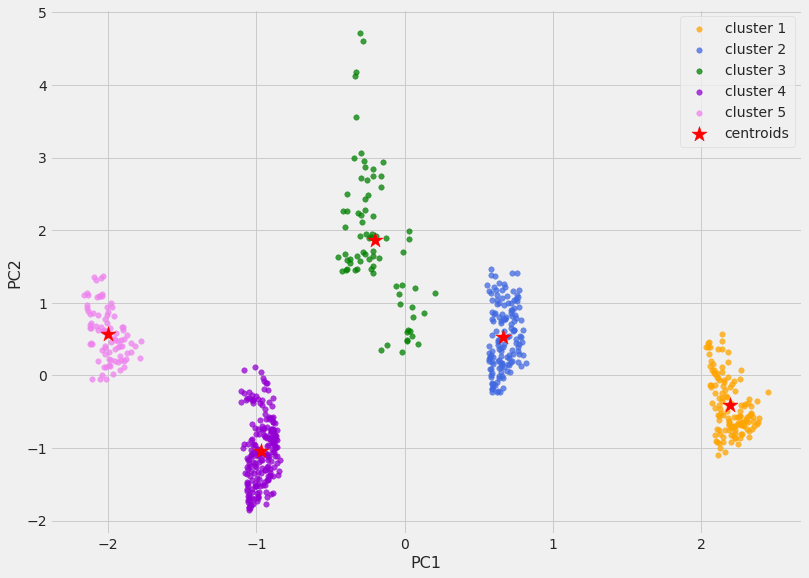

In [209]:
# x_new = pca.inverse_transform(x_pca)

plt.figure(figsize=(12, 9))
plt.style.use('fivethirtyeight')
# sns.scatterplot(x=dum_scaled.iloc[:,1], y=dum_scaled.iloc[:,0])
# sns.scatterplot(
#     x=x_pca.iloc[:, 0], y=x_pca.iloc[:, 1],
#     alpha=0.8, hue=dum_scaled['label'], markers='o', s=30, palette=['orange', 'blue', 'green'],
# )
# sns.scatterplot(x=x_new[:, 0], y=x_new[:, 1], alpha=1.0, hue=dum_scaled['label'])
plot_clusters_pca(X=x_pca, clusters=dum_scaled['label'].values, plt_cluster_centers=True)
# for i in range(3):
#     plt.scatter(
#         x=[x_pca.PC1[dum_scaled['label'] == i].mean()],
#         y=[x_pca.PC2[dum_scaled['label'] == i].mean()],
#         marker='*',
#         c=['red'],
#         s=300,
#         label='centroid'
#     )
# plt.legend(['cluster0', 'cluster1', 'cluster2', 'centroid'])
# plt.xlabel('PC1')
# plt.ylabel('PC2')
plt.show()

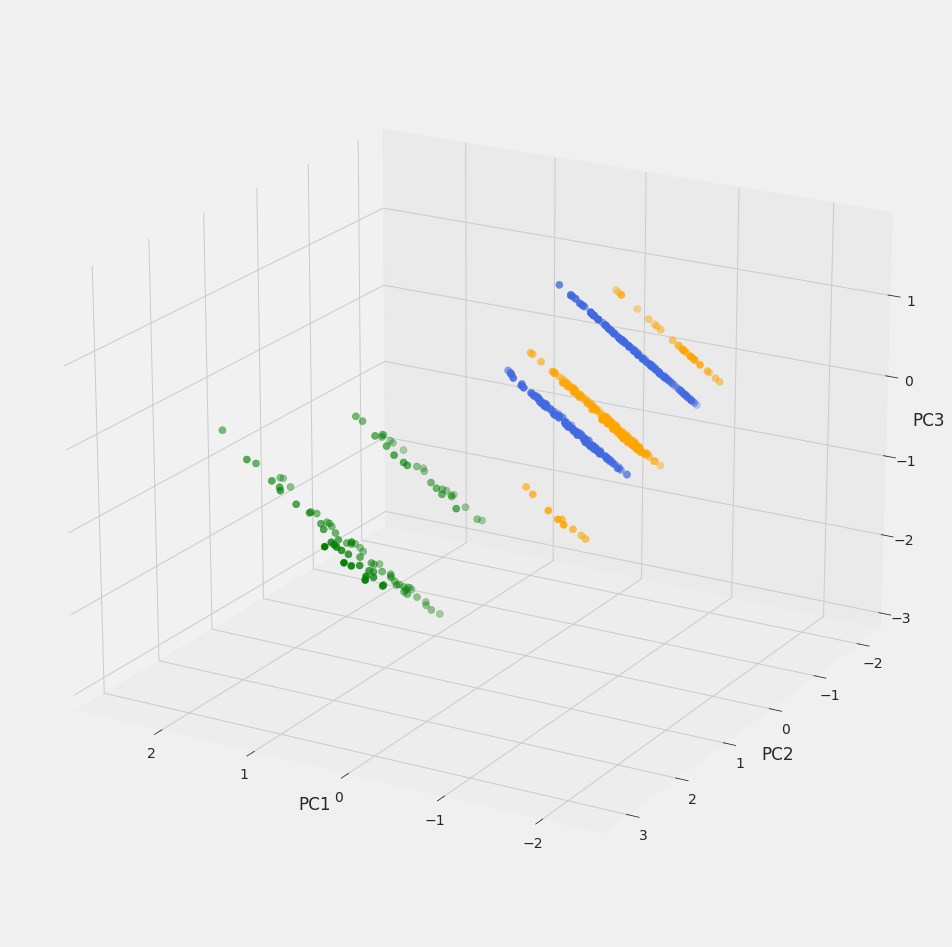

In [40]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca.PC1[dum_scaled.label == 0], x_pca.PC2[dum_scaled.label == 0], x_pca.PC3[dum_scaled.label == 0], c='orange', s=50)
ax.scatter(x_pca.PC1[dum_scaled.label == 1], x_pca.PC2[dum_scaled.label == 1], x_pca.PC3[dum_scaled.label == 1], c='royalblue', s=50)
ax.scatter(x_pca.PC1[dum_scaled.label == 2], x_pca.PC2[dum_scaled.label == 2], x_pca.PC3[dum_scaled.label == 2], c='green', s=50)
# ax.scatter(x_pca.PC1[dum_scaled.label == 3], x_pca.PC2[dum_scaled.label == 3], x_pca.PC3[dum_scaled.label == 3], c='purple', s=50)
ax.view_init(20, 120)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()